In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
import matplotlib
import mglearn
import os

from preamble import *
#plt.rcParams['image.cmap'] = "gray"

from matplotlib.pyplot import rc
rc('font',family='New Gulim') #plot 한글폰트 적용

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
# 5.2
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#5.3.2
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from mglearn.datasets import make_blobs 
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [3]:
digits = load_digits()

### 5.3.3 다중 분류의 평가 지표

- 다중클래스 분류문제에서 불균형 데이터에 대해서 Accuracy(정확도) 지표는 좋은 지표가 되지 못함.
    - 훈련 샘플 비율
        - A 클래스: 85%
        - B 클래스: 10%
        - C 클래스: 5%
    - 실제 새로운 데이터도 위와 같은 비율로 출현한다고 하면 아무런 학습이 안된 모델 (Dummy Model)도 85% 정확도를 산출할 수 있음.

In [6]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Shape of Test data: {}".format(y_test.shape))
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

Shape of Test data: (450,)
정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


- 다중 클래스 예측 결과에 대한 confusion matrix
    - 행: 정답 레이블
    - 열: 예측 레이블
- 위 confusion matrix에서 레이블 0에 대한 해석 $ \begin{bmatrix} TN & FP \\ FN & TP \end{bmatrix} =  \begin{bmatrix} 413 & 0 \\ 0 & 37 \end{bmatrix} $

- 클래스 0에 대해서는 거짓 음성(FN)이 없음
    - 첫번째 행(예측 레이블 행)에서 다른 항목들이 모두 0
- 클래스 0에 대해서는 거짓 양성(FP)이 없음
    - 첫번째 열(정답 레이블 열)에서 다른 항목들이 모두 0
- Accuracy = 1.0
- Precision = 1.0
- Recall = 1.0
- F1-score = 1.0 

- 위 confusion matrix에서 레이블 1에 대한 해석 $ \begin{bmatrix} TN & FP \\ FN & TP \end{bmatrix} = \begin{bmatrix} 402 & 5 \\ 4 & 39 \end{bmatrix} $
- 클래스 1에 대해서는 거짓 음성(FN)이 4건
- 클래스 1에 대해서는 거짓 양성(FP)이 5건
- Accuracy = (402+39)/450 = 0.98
- Precision = 39/(39+5) = 0.89
- Recall = 39/(4+39) = 0.91
- F1-score = 2 x 0.89 x 0.91 / (0.89 + 0.91) = 0.90

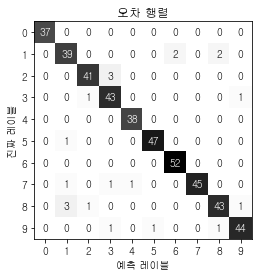

In [10]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [11]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



- 관심있는 클래스를 양성, 그 외의 모든 클래스는 음성으로 두고 precision, recall, f1-score 계산


- [NOTE] 다중 분류에서 불균형 데이터셋을 위해 가장 많이 사용되는 지표는 f1-score
- 클래스별로 f1-score를 산출한 이후, 전체 클래스에 대한 평균 f1-score 산출 전략 (다중 클래스일 때 반드시 아래 세 개의 항목 중 하나를 average 파라미터 값으로 제시해야 함)
    - weighted 평균 (보통은 이것을 선택) : 불균형 데이터를 이용하는 경우
        - 클래스별 테스트 데이터 샘플 수로 가중치를 두어 f1-score 계산 
        - (classification_report에 노출되는 값)
    - macro 평균
        - 클래스별 f1-score에 가중치를 고려하지 않음
    - micro 평균
        - 모든 클래스별로 FP, FN, TP의 총 수를 헤아린 다음 산출

In [7]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))
print("weighted 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="weighted")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954
weighted 평균 f1 점수: 0.953


### 5.3.4 회귀의 평가 지표

- [note]: http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 


- $ R^2$  score (the coefficient of determination)
![R^2_score](./R^2_score.png)
    - where
![y_bar](./y_bar.png)    
    - It provides a measure of how well future samples are likely to be predicted by the model.
    - $ \hat{y}_i$: the predicted value of the i-th sample
    - $y_i$: the corresponding (correct) target outpu

In [8]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_test = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print("explained_variance_score:", explained_variance_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("mean_squared_log_error:", mean_squared_log_error(y_test, y_pred))
print("median_absolute_error:", median_absolute_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

explained_variance_score: 0.9571734475374732
mean_absolute_error: 0.5
mean_squared_error: 0.375
mean_squared_log_error: 0.12803912255571967
median_absolute_error: 0.5
r2_score: 0.9486081370449679


- [NOTE]: 전형적인 교차검증을 활용한 Regression 모델 구성 및 성능 측정

In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingRegressor

X, y = mglearn.datasets.make_wave(n_samples=200)
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

print()

param_grid = {    
    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
    'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
}

estimator = GradientBoostingRegressor()

grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

grid_search.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("Best parameters:\n{}".format(grid_search.best_params_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

y_pred = grid_search.predict(X_test)

print()

# Possible scoring
print("explained_variance_score:", explained_variance_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
#print("mean_squared_log_error:", mean_squared_log_error(y_test, y_pred))
print("median_absolute_error:", median_absolute_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

X shape: (200, 1)
y shape: (200,)
X_train shape: (150, 1)
X_test shape: (50, 1)

Best cross-validation accuracy: 0.67
Best parameters:
{'alpha': 0.1, 'learning_rate': 0.1}
Best estimator:
GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Test set score: 0.62

explained_variance_score: 0.6333933570920071
mean_absolute_error: 0.4410440244803421
mean_squared_error: 0.2945365131871811
median_absolute_error: 0.37617245551529926
r2_score: 0.6195689836183305
